# Generalised Monte Carlo Pi Approximation In N Dimensions


## Introduction

This experiment aims to evaluate the accuracy of pi approcimations using Monte Carlo simulation as the number of dimensions increases. 
The method is based on the two-dimensional approach which starts from a quarter of a circle of radius one and centre at the origin inscribed within a square with edges of size one. By randomnly generating points in the circle and counting how many fall within the quarter of the circle, we can approximate pi as: 
$\pi = 4\frac{p_{inside}}{n}$.
To extend this to a larger dimension, let us consider a hyperspehere of dimension N and a hypercube of dimension N in an N-dimensional Euclidean space. We can no longer look at a quarter of the hypersphere, but at a fragment of its hypervolume, particulary:

$\large k=2^{-N}V_N$, where $\large V_N = \frac{\pi^{N/2}}{\Gamma(\frac{N}{2}+1)}$

We then have that the number of points within the hypersphere over the total number of points is equal to k over 1 (the voume of the hypercube):

$\large 2^{-N}\frac{\pi^{N/2}}{\Gamma(\frac{N}{2}+1)} = \frac{p_{inside}}{n}$

We obtain:

$\large\pi = \bigg[{\frac{p_{inside}\Gamma(\frac{N}{2}+1)2^N}{n}}\bigg]^{\frac{2}{N}}$

## Simulation

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp

np.random.seed(0)

N = 20 #maximum number of dimensions
n = 100000 #maximum number of generated points

def mc_pi_simulation(N, n):
    #N is the dimension of the space
    #n is the number of points to be randomnly generated
    points = np.array([np.random.random(N) for j in range(n)])
    p_inside = np.sum(np.sum(points ** 2, axis = 1) <= 1)
    return 4 * ((p_inside ** (2 / N)) * (sp.gamma(N/2 + 1)** (2 / N))) / (n ** (2 / N))
    
simulated_values = np.array([mc_pi_simulation(i, n) for i in range(2, N + 1)]) 
for i in range(N-1):
    print(f"{i+2}-dimensional approximation: {simulated_values[i]}")


2-dimensional approximation: 3.13304
3-dimensional approximation: 3.150351449125359
4-dimensional approximation: 3.1231266384826597
5-dimensional approximation: 3.155955876349877
6-dimensional approximation: 3.12430700366664
7-dimensional approximation: 3.164431261698918
8-dimensional approximation: 3.1188391844218626
9-dimensional approximation: 3.1531777296625734
10-dimensional approximation: 3.146523537556046
11-dimensional approximation: 3.0697087249196837
12-dimensional approximation: 3.2771044908549087
13-dimensional approximation: 3.041170787301874
14-dimensional approximation: 3.1820096713151047
15-dimensional approximation: 0.0
16-dimensional approximation: 3.5706728122213636
17-dimensional approximation: 0.0
18-dimensional approximation: 0.0
19-dimensional approximation: 0.0
20-dimensional approximation: 0.0


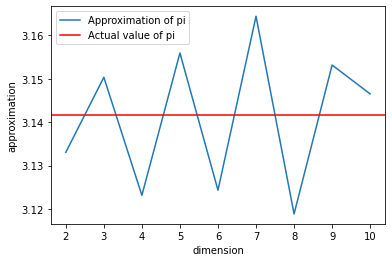

In [38]:
fig = plt.figure()
ax = fig.add_subplot()
plt.plot(np.arange(2, N+1), simulated_values, label = 'Approximation of pi')
plt.axhline(np.pi, xmin = 0, color = 'red', label = 'Actual value of pi')
plt.xlabel('dimension')
plt.ylabel('approximation')
plt.legend()

## Statistics

In [43]:
mean = np.mean(simulated_values)
sd = np.std(simulated_values)
print(f"Sample mean: {mean}")
print(f"Sample standard deviation: {sd}")

Sample mean: 3.141083631218215
Sample standard deviation: 0.015604386875296541


## Conclusion

Based on our results, we observe that for a reasonable dimension, the approximations do not vary significantly. In fact, we computed a standard deviation of around 0.01. It seems that increasing the number of dimensions does not increase accuracy and, worsely, it seems to make our approach unreliable because of the 'curse of dimensionality'. Given the considerably smaller volume of the section of hypersphere relative to the volume of the hypercube, the probability of generating a point within the hypershpere is virtually 0. Therefore, the standard 2-dimenstional approach appears to be the most effective version of this algorithm.